#Support Vector Binary Classification of Disease State with Cycle Averaged Sensor Data
##Input Data: 15 sensor map of the cardiac cycle over a 1 second period ($15\times2000$)

##Investigation of:
* Classifier prediction performance.
* Out of sample prediction error.
* The effect of kernel choice: Linear, Polynomial, RBF.
* The effect of subsampling the time series. From 2000 down to $\sim$200 in steps.

**Daniel Wilson and John Mooney**

In [1]:
import mlpy.wavelet
import mcg
import numpy as np
import datetime
import timeit
import time
import copy
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import time
import gc
from matplotlib.mlab import PCA
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
from sklearn import svm
#matplotlib

mcg.deviceID = 'mk1'
mcg.setDeviceID()

#%matplotlib inline
from skimage.feature import match_template

alphaPlus
mk1


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#Load data from HDF5 store

In [2]:
#loading in data
store = pd.HDFStore('store.h5')
store

<class 'pandas.io.pytables.HDFStore'>
File path: store.h5
/DF_autosel              frame        (shape->[699,110])
/DF_expertsel            frame        (shape->[428,113])

In [3]:
dfe = store.get('DF_expertsel')

In [4]:
#These are the keys for all the people
TRkeys = ['b3b91a075db3855e2d8d865ea25f3879', '24958c6d339683c981fa4589c611c761',
          'e49a899e4a35586c9cf0abe3b60fac89', 'c77b360b908b84736af82f1c58fffe99',
          'eb71f5928da7ae870825b32707b365d1', 'e29b0a9a0d76396f9825cca9adbd642e',
          '521a2a7408924abe00ade1bd9a3e907c', '685777c5ac77a96bbf4155eb7c2d1dd5',
          'c72c74844c9ae52225b8930bf88c0580', 'a11d66b95134c13c3de8869f4e811582',
          '9aa5263db2a1c22ed5e86db021f7bc0b', '587d11646a73de6b55472af5bf703de7',
          '25b5f2c00541e1a3a3f1eaaf2504f8d2', 'ce82758d2ac42a2f2a197e0b4a3ae04e',
          '3c69dc4d60898ad2632a058d5e11db45', '83d312098265e0e0e09736d447aa734c',
          'eba6cd21897014cd9c672da68f839bef', '9a64265b91bb7cc38ab00b726cbbc725',
          'f64913c0236b1ef9e936e59adcc74fe1', 'fd87f665b8bfed4b0eb5b3850cec4d7f',
          'cce612a6e43e82f3c4bd63d8375ebca7', '2c344015c5c8fca5b1d3162e86b16576',
          'f838df23f40d901f178d22f0230ca96d', '24d12f02353bf3d209946ded6f55ab4e',
          'aa4e2a8dc1f520307b0edc94df4d4883', '027fcab4d250327f001b1e8039e6d9f8',
          '79cfdf26b35c1ed684308488897245b4', '7f0488175e10164d95a4ae0e57c225db',
          '08951c7805a2461962b0d724c864380d', '7d73c33f57b171eb7c7139975b3a6db4',
          '817db5b9bdcff7ae1da53c6ed79baa5a', 'a2d0ca6fb2a5d73944b4a11560fa2bc5',
          '1b5f1203109e2476f5e7e0bb0805714c', '2148dd132138e10f006d43726cda7ed9',
          '20a9eafcd6cf54b494808df3239bde9b', 'e731f7f04bb68ac8a54c7ae4603645ba',
          '9728a01e0e4c0770bea329f4c7dfbd77', '7715a5c99e9e1b8f617980345fed15cf',
          'ecc1ccaebf76887ae5d1fc1f02397e72', '5125afeca6031f96b0b91016057d9526',
          '737acd87d493481fedc5b29e05f9200d', 'a250e177f138e0da5393ec7b15de8cd9',
          '07d1a9b98501db44c41098f1f0897841', '5c2844ef19a0974848fd6b72281da9aa',
          '06cf128ddc7d62bc3cf848eae79b240c', 'bb6a31389d79503f74121491ba9d33cf',
          '1b789758c4f5f7f1534923e8121c832e', 'e8814fa36a4f3ef138331ae4d408035c',
          '20709c4e9e80fef2be632638bb6c066f', 'a6c1776beb8a26272b178f3b278ccb4b',
          'fddcdfa9880b44fe5dc489cbdb0b8e75', 'a0d4a1570f23b604bc851c2efb320859',
          '060276246a2ffd4db1e218a26b850479', '8bcf0e840a586639e5f9d9fdbb7a6631',
          '7185dedbb8c7f280eb6ad3eb635ac5cc', 'd8121c5045b76b09819824cd51df50da',
          'e0ce6ce4220b14f19885966b9b2c4c07', '317b39e1319be27c9410fb87aa6cfe9b',
          '769202eaf703a273f2107f6d6e262ae7', '8f273b9acf5150e07112f9bd43b2cd9a',
          '5f96443a9da689b201478d4d10f13b4d', '52dfb2806ba303139c052780db6563ad',
          '95235e40f223d36e1e8ce58517c7ec65', 'a14103072bb438fe503910ae30a9ec19',
          'e15cb371b7e2d30057895031583e8a3e', '18a77e78f8616d5ce150a97ba0c631b9',
          '1c9dc800cefdb4faa1332fa13a10e38e', '3c5da0d5ce1f76a37ff203f8b12b00da',
          '831405ff01b7d7105a6df86eb104a729', '8ca1948d95f529f6ab5e0b3605959ade',
          'ba485f7d407c75a9849f6758bc8a17c7', 'a0240f2c56f1224e83f7c7f539508864',
          'c4bc20dd85e352af35400d5e9219633d', '1a5b03ea8b6450f584eb1c3194b5a637',
          '4ab0f6d624cc02d9ca8427d35ae96c03', 'bc15e2ce44b19e3947ba83ede74e2f49',
          '56145ce4fae8654cae3dd41bdd12d9c6', 'b56ed7ee8a39b644a3ae427bfad0003a',
          '540c956a76280e5487c98fd35690192b', '135ab1432f211ffa3e77f5a1449c4163',
          'ef9a1981ddef5857b3851ced0f6a9149', '9af089e682f5f7fa445429dfae86b799',
          '48b9a4bfeb80d0bf1cfa8ba96579e82f', '169223512d1fbe477709bcde7143b66a',
          '1bf5617e7ad39a796d55cd4a0edb246f', '3c4034212ebccd7082d161f4f8b5cf6c',
          '413ed3450a56c5b702104034c3e07bbf', 'be194126761c267973f87e620bdca773',
          '0ff5c43bb153fa729aa595a5656f3b4b', '917bc2a8c291422934f40b8990242275',
          'bb1bcb2f97e4ceef38a51973a98b86e0', 'd5b61ad44c964645dedab2dbba550044',
          '343863dcd24c8598c11e447e9a1c15ec', '497f9581a64d7b1b58bb0b4d5759d101',
          '5d9aa192c26f58092490fd75195e49e2', 'da4511230a57b98cb1bf25e970d3e477',
          '1cd806ef4b3b75d33a936649f5089169', '10f2739d3aeed8f388038fade3b9601d',
          '2f4a75bb446a434b77002cccf44ef75d', 'ebd1fe223e567baf5755d7c8595e3987',
          'f3456532816d3ab6241bf04f03d220d8', '9fbdc71e6c0b05998c5ff268e5070b60',
          'd0cb9b0697ed5dd6fe1401297ef2e5f7', '80e1b2a4a0aa33476f5c77b55cc0eb7e',
          'd13a92d7ec271c8b44e9ab33ffef2d23', 'b49ba1022e59137850f21d0b05a0850f',
          '0bb6000451b6e79d88f53636b516f8e3', '4ac21d7b0967f2cc3ad758036f0b5bae',
          'e335900ed09ecb5d54df86f5228549b4', '2759bb03ff319700c3777f05762fa1c1',
          '06ed1b074239a3da07f82d92c31007f2', '520d89bf849014f1cc5b3c27f0af4e3f',
          'ff768828776a35332b1bda7a2c167974', 'be83bf261bb18d8c9fa404ee476d6c5c',
          '61b40a85eb3d9f048ce351f05cc40306', '06906c5292121bfa352fef7ff52d9065',
          '75f27474d4a4c77d606b464f2eb777aa', '011887e97eed8b6cf100eb88fb0b4e55',
          '3a2d15e6d61efaba7b376395b8dcdfc6', '484e6f9ec2fb24005af2e32ce12f51e2',
          '766e2ad3e33166a209b06d48c7eda47c', '97f49ed9622b100b03d80b14ed4011d8',
          'f39ea38c29edcec527a1c82749ee49c5', '79b370935c0ba511ba091d3f6e76ef34',
          '8f9fc69fe3c966cecc0320c357801adf', '3f809554c0c5a953f57ce49ad28b70af', 
          '720bbd6b3d42487dcbde668f73406e27', 'ffe4b39de83a0418698aca54618f4af3']

In [5]:
dfe['class']

055f40f15c6725c8c52277c993f1e27d       H
b3b91a075db3855e2d8d865ea25f3879       H
a6c1776beb8a26272b178f3b278ccb4b       H
e11d17d5a5e433535222026114d44085       H
e41cb45ee3a75214f0e624b5d2ed25db       H
d577384cfd13fd63df8a22b5d108350e       H
24958c6d339683c981fa4589c611c761       H
fddcdfa9880b44fe5dc489cbdb0b8e75       H
62150be54def97abe0677edd4e5fc3b2       H
e9e0ae9738d8de690d018f45bccbc1c7       H
e49a899e4a35586c9cf0abe3b60fac89       H
a0d4a1570f23b604bc851c2efb320859       H
61514d8aa953840bae26ecf4fac8a452       H
50eec89c49732e253b1ebb96bdb46c7d       H
c77b360b908b84736af82f1c58fffe99       H
060276246a2ffd4db1e218a26b850479       H
bafa105b767a820a7262e17a46070eb5       H
1d8713617bac3bbc9ce92d4f7087bf99       H
eb71f5928da7ae870825b32707b365d1       H
8bcf0e840a586639e5f9d9fdbb7a6631       H
365352e9fea1cac3ef7f9212a46d5586       H
355850f479f2510a64ab9483c198c721       H
e29b0a9a0d76396f9825cca9adbd642e       H
7185dedbb8c7f280eb6ad3eb635ac5cc       H
d2252fb56a3b1577

In [6]:
dfe['study']

055f40f15c6725c8c52277c993f1e27d    6060
b3b91a075db3855e2d8d865ea25f3879    6060
a6c1776beb8a26272b178f3b278ccb4b    6060
e11d17d5a5e433535222026114d44085    6060
e41cb45ee3a75214f0e624b5d2ed25db    6060
d577384cfd13fd63df8a22b5d108350e    6060
24958c6d339683c981fa4589c611c761    6060
fddcdfa9880b44fe5dc489cbdb0b8e75    6060
62150be54def97abe0677edd4e5fc3b2    6060
e9e0ae9738d8de690d018f45bccbc1c7    6060
e49a899e4a35586c9cf0abe3b60fac89    6060
a0d4a1570f23b604bc851c2efb320859    6060
61514d8aa953840bae26ecf4fac8a452    6060
50eec89c49732e253b1ebb96bdb46c7d    6060
c77b360b908b84736af82f1c58fffe99    6060
060276246a2ffd4db1e218a26b850479    6060
bafa105b767a820a7262e17a46070eb5    6060
1d8713617bac3bbc9ce92d4f7087bf99    6060
eb71f5928da7ae870825b32707b365d1    6060
8bcf0e840a586639e5f9d9fdbb7a6631    6060
365352e9fea1cac3ef7f9212a46d5586    6060
355850f479f2510a64ab9483c198c721    6060
e29b0a9a0d76396f9825cca9adbd642e    6060
7185dedbb8c7f280eb6ad3eb635ac5cc    6060
d2252fb56a3b1577

In [70]:
#separtaing out the H's from T's
H = dfe.ix[TRkeys].ix[(dfe['class']=='H')]
T = dfe.ix[TRkeys].ix[(dfe['class']=='T')]
P = dfe.ix[(dfe['class']=='P')]
P['class']='T'
lst = pd.concat([H,T,P])

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [64]:
print len(P)
print len(T)
print len(H)

150
30
98


In [72]:
#DROP THAT NAN - removing nan values from the data
lst = lst.dropna(subset = ['CoilData'])


In [9]:
#Confirming that the Nans have been dropped
lst['CoilData']

b3b91a075db3855e2d8d865ea25f3879    [[-4.75556224107e-07, -4.60237651145e-07, -4.4...
24958c6d339683c981fa4589c611c761    [[-6.65862649305e-07, -6.25102576548e-07, -5.8...
e49a899e4a35586c9cf0abe3b60fac89    [[-4.59267051185e-07, -4.57272980391e-07, -4.5...
c77b360b908b84736af82f1c58fffe99    [[-3.01455407739e-07, -3.45564895258e-07, -3.8...
eb71f5928da7ae870825b32707b365d1    [[1.43623320406e-05, 1.41329294346e-05, 1.3907...
e29b0a9a0d76396f9825cca9adbd642e    [[8.83454102209e-07, 8.73291572644e-07, 8.6290...
521a2a7408924abe00ade1bd9a3e907c    [[3.11073772951e-06, 3.06409207601e-06, 3.0174...
685777c5ac77a96bbf4155eb7c2d1dd5    [[7.67249194658e-09, 1.99095853489e-08, 3.1166...
c72c74844c9ae52225b8930bf88c0580    [[-2.19276122367e-06, -2.22735253488e-06, -2.2...
a11d66b95134c13c3de8869f4e811582    [[-2.87882172965e-07, -2.72764809656e-07, -2.5...
9aa5263db2a1c22ed5e86db021f7bc0b    [[-3.4440786393e-06, -3.40103555805e-06, -3.35...
587d11646a73de6b55472af5bf703de7    [[4.25868110061e-0

In [12]:
#Variables
dfe.columns.tolist()

['AutoDiagnose',
 'CoilData',
 'ECG-Threshold',
 'ECGAve',
 'Flag',
 'Heartrate (bpm)',
 'Heartrate-Variability',
 'Minutelist',
 'QR_angle',
 'QR_corr',
 'QR_length',
 'QR_vector',
 'QRcursor',
 'R-T_mean',
 'R-T_p2p',
 'RS_angle',
 'RS_corr',
 'RS_length',
 'RS_vector',
 'RScursor',
 'RTinterval',
 'R_WaveletPeaks',
 'R_corrmean',
 'R_corrts',
 'R_meanPosition',
 'R_meancorrvar',
 'R_p2p',
 'R_stdcorrvar',
 'R_stdev',
 'R_zc',
 'R_zc mean distance',
 'R_zc total',
 'RpeakZC',
 'SAVETIME',
 'STUDYID_Patient',
 'T1_angle',
 'T1_corr',
 'T1_length',
 'T1_vector',
 'T1cursor',
 'T2_angle',
 'T2_corr',
 'T2_length',
 'T2_vector',
 'T2cursor',
 'T3_angle',
 'T3_corr',
 'T3_length',
 'T3_vector',
 'T3cursor',
 'T4_angle',
 'T4_corr',
 'T4_length',
 'T4_vector',
 'T4cursor',
 'T_WaveletPeaks',
 'T_corrmean',
 'T_corrts',
 'T_meanPosition',
 'T_meancorrvar',
 'T_p2p',
 'T_stdcorrvar',
 'T_stdev',
 'T_zc',
 'T_zc mean distance',
 'T_zc total',
 'Total heartbeats',
 'TpeakZC',
 'USER',
 'UserFl

In [73]:
#splicing H data
print type(H.ix[0,'CoilData'])
print H.ix[0,'CoilData'].shape
print H.ix[0,'CoilData'].T[::2].T.shape
H2 = H.ix[0,'CoilData'].T[::2].T


<type 'numpy.ndarray'>
(15, 3000)
(15, 1500)


In [74]:
#creating a list of classes 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = lst['class'].tolist()
le.fit(y)
y = le.transform(y)
print y.shape

(257,)


In [75]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [12]:
#creating the coil data to learn from
#chhose from:RS_length,R-T_mean,T4_corr,T4cursor,T_meancorrvar,T2_angle,T3cursor,T_stdev,T1_length,QRcursor
X1 = lst['T1_length'].values.tolist()
X2 = lst['QRcursor'].values.tolist()
X3 = lst['T3cursor'].values.tolist()
X4 = lst['T4cursor'].values.tolist()
X5 = lst['R-T_mean'].values.tolist()
X6 = lst['T_meancorrvar'].values.tolist()
X7 = lst['T2_angle'].values.tolist()
X8 = lst['RS_length'].values.tolist()
X9 = lst['T4_corr'].values.tolist()
X10 = lst['T_stdev'].values.tolist()
print y,len(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1] 120


In [91]:
#combining the two lists and preprocessing
X1_norm = preprocessing.scale(X1)
X2_norm = preprocessing.scale(X2)
X3_norm = preprocessing.scale(X3)
X4_norm = preprocessing.scale(X4)
X5_norm = preprocessing.scale(X5)
X6_norm = preprocessing.scale(X6)
X7_norm = preprocessing.scale(X7)
X8_norm = preprocessing.scale(X8)
X9_norm = preprocessing.scale(X9)
X10_norm = preprocessing.scale(X10)
val = np.column_stack((X1_norm,X4_norm,X5_norm,X6_norm,
                       X7_norm,X8_norm,X9_norm,X10_norm))

In [76]:
#checking to see if there are any floats, caused by the Nans, should still have 120
X = lst['CoilData'].values.tolist()
for i, x in enumerate(X):
    #print i,type(x)
    if type(x)==float:
        
        print x
        index = []
        index.extend([i])
        #print index
        #X = np.delete(X,index)
print len(X)


257


In [77]:
#Cutting the readings down to 2000
for i, x in enumerate(X):
    #print 'a', X[i].shape
    X[i] = x.T[0:2000].T
    #print 'b', X[i].shape

In [78]:
#flattening X
for i, x in enumerate(X):
    X[i]= x.flatten()

#SVC

In [ ]:
from sklearn.grid_search import GridSearchCV #optimizing gamma and c
from sklearn import cross_validation

In [79]:
#normalising the data, set 0 as mean value
val = preprocessing.scale(X) #CoilData

print val.shape

In [81]:
clf = svm.SVC(kernel="rbf" , probability = True, cache_size = 600, class_weight = 'balanced')

In [82]:
gamma_range = np.logspace(-9, 3, 13)
c_range = np.logspace(-2, 10, 13)
param_grid = dict(gamma = gamma_range, C = c_range)
print param_grid

{'C': array([  1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
         1.00000000e+01,   1.00000000e+02,   1.00000000e+03,
         1.00000000e+04,   1.00000000e+05,   1.00000000e+06,
         1.00000000e+07,   1.00000000e+08,   1.00000000e+09,
         1.00000000e+10]), 'gamma': array([  1.00000000e-09,   1.00000000e-08,   1.00000000e-07,
         1.00000000e-06,   1.00000000e-05,   1.00000000e-04,
         1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03])}


In [84]:
CV = cross_validation.StratifiedKFold(y, n_folds=6, shuffle = True)

In [85]:
grid = GridSearchCV(clf, param_grid, cv=CV, scoring="accuracy")

In [87]:
%time grid.fit(val, y)

CPU times: user 1h 33min 57s, sys: 8.02 s, total: 1h 34min 5s
Wall time: 1h 34min 7s


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ..., 1 1], n_folds=6, shuffle=True, random_state=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=600, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'gamma': array([  1.00000e-09,   1.00000e-08,   1.00000e-07,   1.00000e-06,
         1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [88]:
print grid.best_score_

0.824902723735


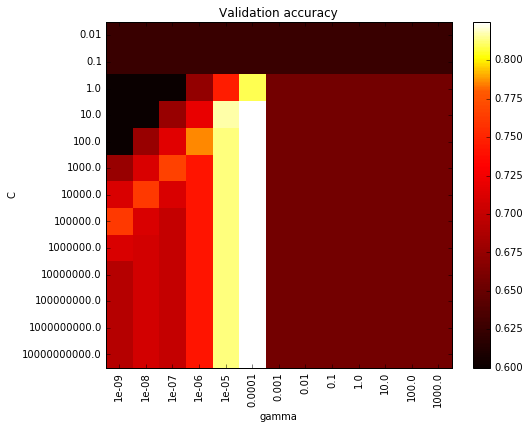

In [108]:
#Draws validation accuracy heatmap
from matplotlib.colors import Normalize
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(c_range), len(gamma_range))

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.6, midpoint=0.78))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=90)
plt.yticks(np.arange(len(c_range)), c_range)
plt.title('Validation accuracy')
plt.show()

In [111]:
print grid.best_score_
print grid.best_params_
#print grid.grid_scores_[79][1]

0.824902723735
{'C': 10.0, 'gamma': 0.0001}


In [92]:
#optimum clf here,with the best params
clf = svm.SVC(kernel="rbf" , probability = True, cache_size = 600, class_weight = "balanced" ,
              C = grid.best_params_['C'], gamma = grid.best_params_['gamma'])

#clf = svm.SVC(kernel="rbf" , probability = True, cache_size = 600, class_weight = "balanced" ,
#              C = grid.best_params_['C'], gamma = grid.best_params_['gamma'])

In [84]:
#kfold cross validation

#shuffle needed otherwise test sets are all healthy or unhealthy
#for train, test in kf_total:
    #print train, '\n', test, '\n\n'

In [112]:
#cross validation score
CVS = cross_validation.cross_val_score
scores = CVS(clf, val, y, cv=CV, n_jobs = 1)
print scores

[ 0.79069767  0.76744186  0.78823529]


In [113]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.02)


In [95]:
#this tells us how well its actualy performing, due to the unbalanced data
from sklearn.metrics import confusion_matrix

sen_list = []
spec_list = []


for i, (train, test) in enumerate(CV):
    y_pred = clf.fit(val[train], y[train]).predict(val[test])
    #print y_pred,"predicted"
    #print y[test], "actual"
    cm = confusion_matrix(y[test], y_pred)

    tn = float(cm[0][0])/np.sum(cm[0])
    tp = float(cm[1][1])/np.sum(cm[1])
    sen_list.append(tp)
    spec_list.append(tn)

mean_sen = sum(sen_list)/float(len(sen_list))
mean_spec = sum(spec_list)/float(len(sen_list))
print "Mean sensitivity is", mean_sen
print "Mean specificity is", mean_spec

Mean sensitivity is 0.974833808167
Mean specificity is 0.572916666667


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2645: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [115]:
SV = clf.n_support_
print sum(SV),SV



169 [ 63 106]


## 2nd Order grid search

In [116]:
gamma_range = np.logspace(-5, -3, 20)
c_range = np.linspace(5, 60, 20)
param_grid = dict(gamma = gamma_range, C = c_range)
print param_grid

CV = cross_validation.StratifiedKFold(y, n_folds=10, shuffle = True)

grid = GridSearchCV(clf, param_grid, cv=CV, scoring="accuracy")

{'C': array([  5.        ,   7.89473684,  10.78947368,  13.68421053,
        16.57894737,  19.47368421,  22.36842105,  25.26315789,
        28.15789474,  31.05263158,  33.94736842,  36.84210526,
        39.73684211,  42.63157895,  45.52631579,  48.42105263,
        51.31578947,  54.21052632,  57.10526316,  60.        ]), 'gamma': array([  1.00000000e-05,   1.27427499e-05,   1.62377674e-05,
         2.06913808e-05,   2.63665090e-05,   3.35981829e-05,
         4.28133240e-05,   5.45559478e-05,   6.95192796e-05,
         8.85866790e-05,   1.12883789e-04,   1.43844989e-04,
         1.83298071e-04,   2.33572147e-04,   2.97635144e-04,
         3.79269019e-04,   4.83293024e-04,   6.15848211e-04,
         7.84759970e-04,   1.00000000e-03])}


In [ ]:
%time grid.fit(val, y)

In [ ]:
print grid.best_score_

print grid.best_score_
print grid.best_params_

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf = svm.SVC(kernel="rbf" , probability = True, cache_size = 600, class_weight = "balanced" ,
              C = grid.best_params_['C'], gamma = grid.best_params_['gamma'])


def sens_spec(clf, CV, val):
    sen_list = []
    spec_list = []
    for i, (train, test) in enumerate(CV):
        y_pred = clf.fit(val[train], y[train]).predict(val[test])
        #print y_pred,"predicted"
        #print y[test], "actual"
        cm = confusion_matrix(y[test], y_pred)

        tn = float(cm[0][0])/np.sum(cm[0])
        tp = float(cm[1][1])/np.sum(cm[1])
        sen_list.append(tp)
        spec_list.append(tn)

    mean_sen = sum(sen_list)/float(len(sen_list))
    mean_spec = sum(spec_list)/float(len(sen_list))
    print "Mean sensitivity is", mean_sen
    print "Mean specificity is", mean_spec

sens_spec(clf, CV, val)

In [ ]:
#Draws validation accuracy heatmap
from matplotlib.colors import Normalize
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(c_range), len(gamma_range))

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.6, midpoint=0.78))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=90)
plt.yticks(np.arange(len(c_range)), c_range)
plt.title('Validation accuracy')
plt.show()

##Useful Functions

In [89]:
print val.shape
print grid.best_params_

(120L, 8L)
{'C': 1.0, 'gamma': 1.0}


In [37]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(CV):
    probas_ = clf.fit(val[train], y[train]).predict_proba(val[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

print auc(fpr, tpr)
mean_tpr /= len(CV)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Sens = ' + str(np.around(mean_sen, 2)) + " Spec = " + str(np.around(mean_spec, 2))
          + " $\gamma$ = " + str(grid.best_params_["gamma"]) + " C = " + str(grid.best_params_["C"]) + " #SV = " + str(sum(SV)))
plt.legend(loc='best', bbox_to_anchor=(0.5, 1.05))
plt.show()



ValueError: class_weight must be dict, 'auto', or None, got: 'balanced'

In [97]:
%matplotlib

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1] actual
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1] actual
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1] actual
[learning_curve] Training set sizes: [ 65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 16

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    3.0s



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.372093 -   0.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.372093 -   0.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.372093 -   0.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.372093 -   0.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.372093 -   1.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.372093 -   1.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.372093 -   1.0s
[CV] 

[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:   10.6s



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.372093 -   1.1s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.383721 -   1.1s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.395349 -   1.1s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.395349 -   1.3s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.395349 -   1.3s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.395349 -   1.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.383721 -   1.5s
[CV] 

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:   16.5s
[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:   26.1s



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.418605 -   1.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.418605 -   1.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.418605 -   1.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.418605 -   1.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.430233 -   1.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.430233 -   2.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.441860 -   1.8s
[CV] 

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:   37.9s
[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:   57.8s



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.604651 -   2.2s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.662791 -   1.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.616279 -   1.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.616279 -   1.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.627907 -   1.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.627907 -   2.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.627907 -   2.2s
[CV] 

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  60 tasks       | elapsed:  1.7min



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.720930 -   2.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.732558 -   2.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.744186 -   2.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.732558 -   2.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.755814 -   2.7s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.779070 -   2.7s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.744186 -   2.7s
[CV] 

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:  2.2min
[Parallel(n_jobs=1)]: Done  84 tasks       | elapsed:  2.9min



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.813953 -   3.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.790698 -   3.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.790698 -   3.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.790698 -   3.7s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.802326 -   3.7s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.802326 -   3.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.802326 -   3.8s
[CV] 

[Parallel(n_jobs=1)]: Done  97 tasks       | elapsed:  3.7min
[Parallel(n_jobs=1)]: Done 112 tasks       | elapsed:  4.5min



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.372093 -   0.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.372093 -   0.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.372093 -   0.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.383721 -   1.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.383721 -   1.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.383721 -   1.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.383721 -   1.0s
[CV] 

[Parallel(n_jobs=1)]: Done 127 tasks       | elapsed:  4.8min
[Parallel(n_jobs=1)]: Done 144 tasks       | elapsed:  5.2min



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.651163 -   1.7s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.651163 -   1.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.662791 -   1.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.651163 -   1.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.662791 -   1.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.651163 -   1.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.662791 -   1.9s
[CV] 

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:  5.8min
[Parallel(n_jobs=1)]: Done 180 tasks       | elapsed:  6.6min



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.709302 -   3.3s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.709302 -   3.2s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.709302 -   3.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.709302 -   3.2s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.709302 -   3.3s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.697674 -   3.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.697674 -   3.4s
[CV] 

[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  7.8min
[Parallel(n_jobs=1)]: Done 220 tasks       | elapsed:  8.9min



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.376471 -   0.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.376471 -   1.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.376471 -   1.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.376471 -   1.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.376471 -   1.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.376471 -   1.1s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.376471 -   1.1s
[CV] 

[Parallel(n_jobs=1)]: Done 241 tasks       | elapsed:  9.3min
[Parallel(n_jobs=1)]: Done 264 tasks       | elapsed: 10.1min



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.705882 -   2.3s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.705882 -   2.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.741176 -   2.7s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.741176 -   2.7s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.741176 -   2.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.729412 -   2.7s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.717647 -   2.6s
[CV] 

[Parallel(n_jobs=1)]: Done 287 tasks       | elapsed: 11.2min
[Parallel(n_jobs=1)]: Done 312 tasks       | elapsed: 12.7min



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.788235 -   4.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.788235 -   4.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.788235 -   4.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.788235 -   4.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.788235 -   4.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.788235 -   4.7s
[ 65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 

[Parallel(n_jobs=1)]: Done 318 out of 318 | elapsed: 13.2min finished


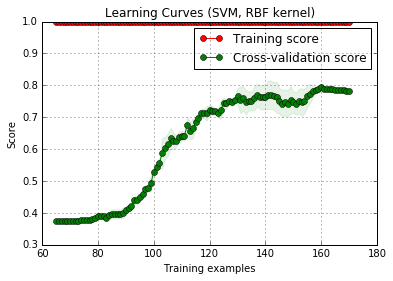

In [109]:
from sklearn import cross_validation
#CV = cross_validation.ShuffleSplit(len(y), n_iter=20,
#                                   test_size=0.1, random_state=0)
CV = cross_validation.StratifiedKFold(y, n_folds=3, shuffle = True)

from sklearn.learning_curve import learning_curve
for i, (train, test) in enumerate(CV):
    y_pred = clf.fit(val[train], y[train]).predict(val[test])
    print y[test], "actual"

#range(65,80)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=CV,
                        n_jobs=1, train_sizes=range(65,171)):

    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, n_jobs=n_jobs, cv=CV, train_sizes=train_sizes, verbose=10)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    print train_sizes
    return plt


title = "Learning Curves (SVM, RBF kernel)"




plot_learning_curve(clf, title, val, y, cv = CV, n_jobs=1)

plt.show()



In [108]:
print y

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [151]:


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(y[names]))
    plt.xticks(tick_marks, y[names], rotation=45)
    plt.yticks(tick_marks, y_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = clf.fit(val[train], y[train]).predict(val[test])
    
# Compute confusion matrix
cm = confusion_matrix(y[test], y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[10  0]
 [ 2  0]]


NameError: global name 'names' is not defined

In later work it will be interesting to reduce the dimensionality of the input. In theory this will reduce the classifiers out of sample prediction error (i.e. predicting on data not in the training set).  

This can be done by feature extraction. Resulting in a timeseries of dipole properties (Angle, Length, MinMaxRatio, Dipole Center position and a measure of each peaks circular symmetry (perhaps using a 2D correlation with an idealised dipole of equivalent angle and length) or with an angluar variance measure?) 

In [28]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve

In [29]:
digits = load_digits()
X, y = digits.data, digits.target

In [ ]:
y